In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [3]:
r = readers.CollectionReader('../src/gaussian_vs_beta/agents')

100%|██████████| 320/320 [00:17<00:00, 17.94it/s]


In [4]:
games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
         "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
         "InvertedDoublePendulum-v2"]
code_level_opts = {
      'clip_eps': [0.2, 1e8],
      'kl_penalty_coeff': [0.0, 3.0],
      'norm_advantages': [True, False],
      'norm_rewards': ['returns'],
      'policy_net_type': ['CtsPolicy', 'CtsBetaPolicy'],
}

In [5]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

## Figure 7

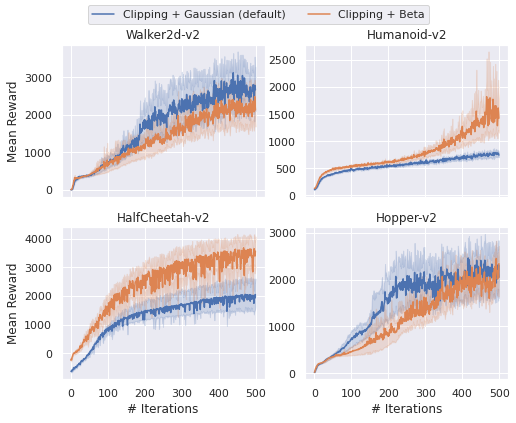

In [6]:
# Plot setup
fig, ax = plt.subplots(2,2, figsize=(8,6), sharex=True)
ax = ax.flatten()

for j, g in enumerate(['Walker2d-v2', 'Humanoid-v2', 'HalfCheetah-v2', 'Hopper-v2']):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"Clipping + Gaussian (default)", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"Clipping + Beta", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
ax[2].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
fig.subplots_adjust(top=0.9)
    
plt.show()

## Figure 12

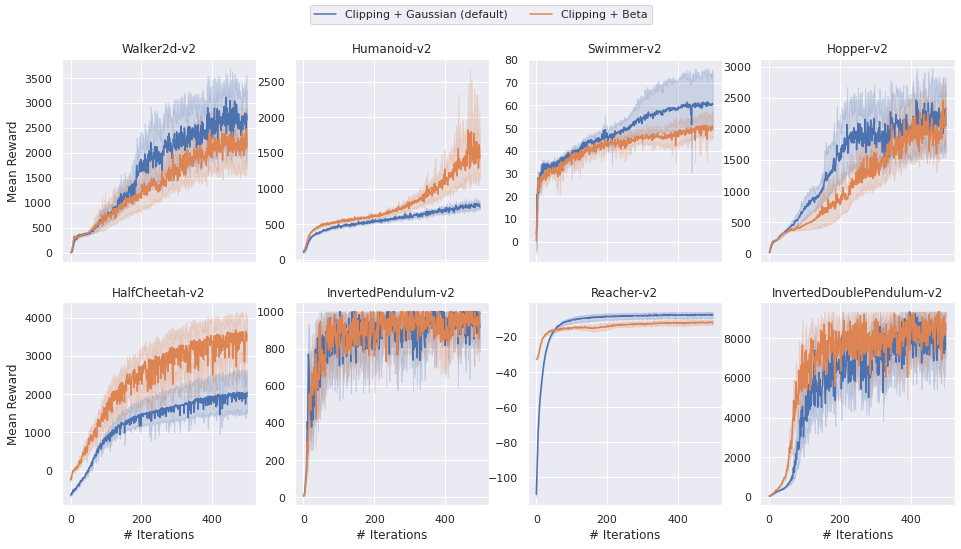

In [7]:
# Plot setup
fig, ax = plt.subplots(2,4, figsize=(16,8), sharex=True)
ax = ax.flatten()

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"Clipping + Gaussian (default)", legend=False)
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"Clipping + Beta", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Mean Reward')
ax[4].set_ylabel('Mean Reward')
for a in ax:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
fig.subplots_adjust(top=0.9)
    
plt.show()

## Figure 14

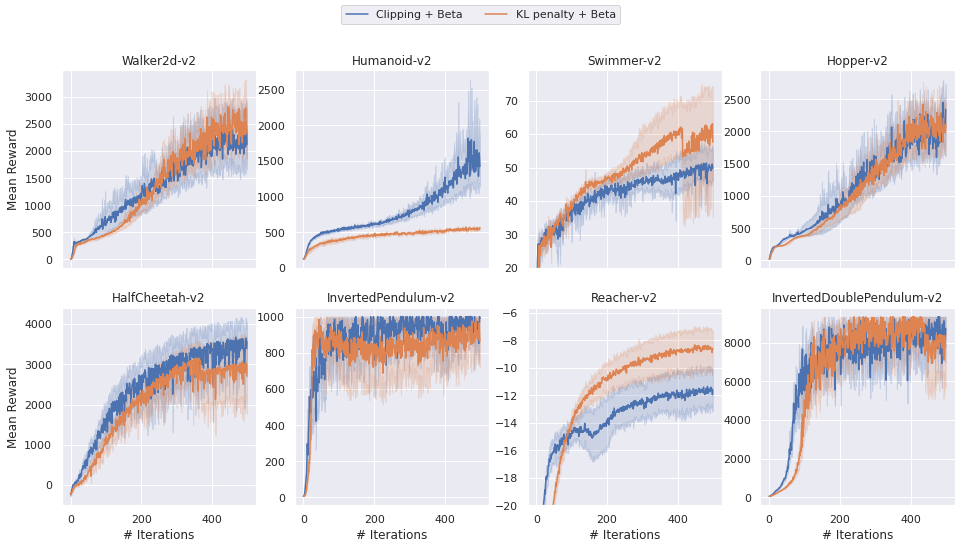

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True)

for j, g in enumerate(games):
    filt = filter_df(opt, game=g, clip_eps=0.2, kl_penalty_coeff=0.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"Clipping + Beta", legend=False)
    filt = filter_df(opt, game=g, clip_eps=1e8, kl_penalty_coeff=3.0, norm_rewards='returns',
                     norm_advantages=True, policy_net_type='CtsBetaPolicy')
    sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                 ax=ax.flatten()[j], label=f"KL penalty + Beta", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    

ax[0][2].set_ylim([20, None])
ax[1][2].set_ylim([-20, None])
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
    
plt.show()